# **Actividad de Laboratorio 1**
## Integrantes: Benjamin Irrarazabal y Joaquin Zepeda 

In [39]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

## **Parte 1**

La primera parte de la experiencia tiene como objetivo el primer acercamiento al procesamiento de imágenes, por lo cual se comenzará con tareas simples, tales como la visualización de imágenes, cambios de códigos de color y el análisis del histograma respectivo para cada imagen.

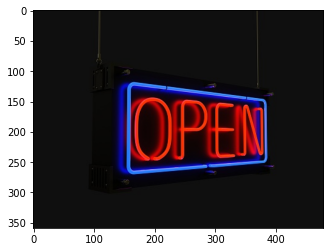

In [40]:
# Siguiendo las indicaciones del enunciado se utiliza imread para cargar la imagen y poder visualizarla posteriormente con imshow.
# Además de las dos funciones propuestas en el enunciado se utiliza una tercera para cambiar el código de color de BGR a RGB.
img_bgr = cv2.imread('open.jpg')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img)

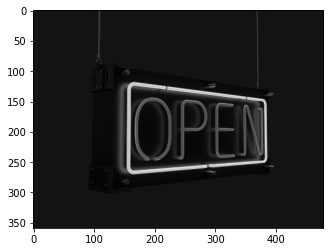

In [41]:
# Luego de visualizar la imagen a color, se utiliza nuevamente un cambio de código de color para ver la figura en blanco y negro
# o escala de grises.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray') # Se debe especificar el cmap='gray' para que funcione de forma correcta.

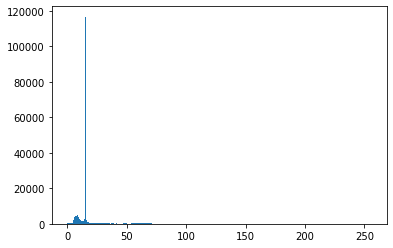

In [42]:
#img_gray_flat = img_gray.flatten()
#plt.hist(img_gray_flat)
# Como se observa a continuación en el histograma de la figura 'open.jpg', este esta cargado hacia el lado del 0, esto 
# significa que la imagen presenta menos tonos blancos y por consiguiente una alta concentración de negro.
plt.hist(img_gray.ravel(),256,[0,256]); plt.show()

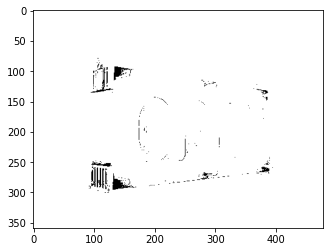

In [43]:
# A continuación, se binariza la imagen tomando distintos umbrales obteniendo el óptimo de manera experimental.
# Usando 5 como UMBRAL
img_bin = cv2.inRange(img_gray,5,255)
plt.imshow(img_bin ,cmap='gray')

Al usar un umbral de 5, se puede observar que la imagen no se alcanza a distinguir, por lo cual no es un umbral válido.

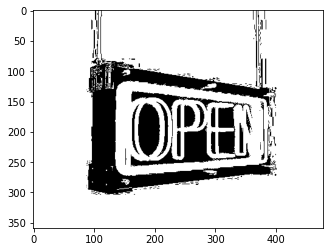

In [44]:
# usando 15 como UMBRAL
img_bin = cv2.inRange(img_gray,15,255)
plt.imshow(img_bin ,cmap='gray')

Al utilizar un umbral de 15 se puede observar la imagen y comprender el contenido de esta, no obstante, el fondo de esta debiera codificarse como negro y no blanco.

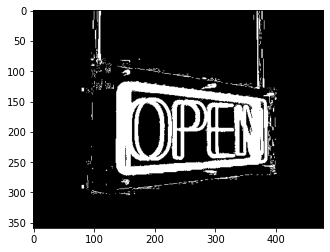

In [45]:
# usando 16 como UMBRAL
img_bin = cv2.inRange(img_gray,16,255)
plt.imshow(img_bin ,cmap='gray')

Luego, al utilizar un umbral de 16, se puede percibir y leer correctamente el texto y los objetos importantes de la imagen, siendo un umbral válido.

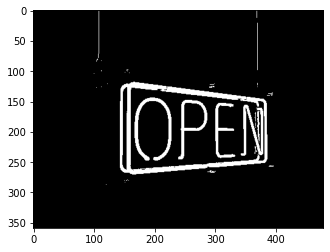

In [46]:
# usando 50 como UMBRAL
img_bin = cv2.inRange(img_gray,50,255)
plt.imshow(img_bin ,cmap='gray')

Al aumentar mucho más el umbral (50), se comienza a perder la visualización de los objetos de fondo de la imagen.

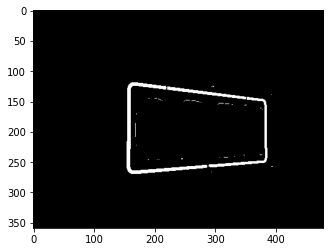

In [47]:
# usando 100 como UMBRAL
img_bin = cv2.inRange(img_gray,100,255)
plt.imshow(img_bin ,cmap='gray')

Y si se continúa aumentando este (100) se pierde por completo la comprensión de la imagen. \\
De lo anterior, se puede destacar que el umbral óptimo se encontraría en 16, esto debido a que presenta una mejor representación de la imagen original, considerando el fondo y los objetos presentes en esta, esto tiene sentido al observar el histograma presentado anteriormente ya que cerca de este valor es que se encuentra el peak presente en este.

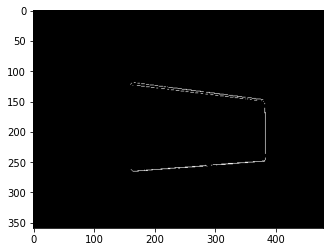

In [48]:
# SEGMENTAMOS LA PALABRA OPEN
# usando 170 como UMBRAL
img_bin = cv2.inRange(img_gray,170,255)
plt.imshow(img_bin ,cmap='gray')

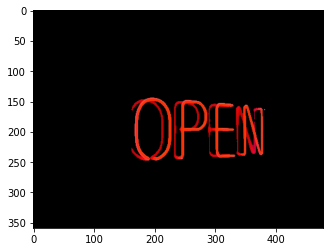

In [49]:
#como es una imagen RGB el canal 0 corresponde al rojo
img_r = img[:,:,0]

mask_r = cv2.inRange(img_r,170,255)/255

#Creamos un contenedor de la nueva imagen
mask_img_r = np.zeros_like(img)

for i in range(mask_img_r.shape[2]):
    mask_img_r[:,:,i] = np.multiply(img[:,:,i],mask_r)

plt.imshow(mask_img_r)

En la imagen anterior se puede observar la segmentación de la palabra open, esto se realizó mediante el filtrado de los canales, dejando la visualización solamente del color rojo.

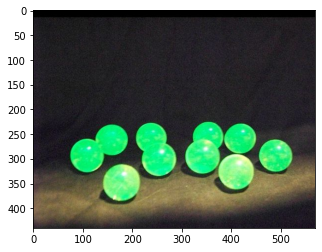

In [50]:
#como es una imagen RGB el canal 1 corresponde al verde
img_bgr = cv2.imread('marbles.JPG')
img_marbles = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_marbles)

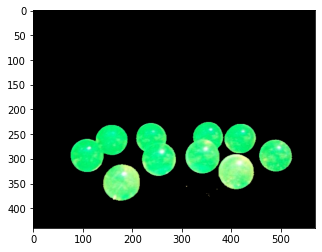

In [51]:
# De la misma forma que en el apartado anterior, se filtran los canales, pero esta vez, se deja visualizar el color verde de las figuras de 
# la imagen 'marbles.jpg'.
img_g = img_marbles[:,:,1]

mask = cv2.inRange(img_g,171,255)/255

#Creamos un contenedor de la nueva 
mask_img = np.zeros_like(img_marbles)

for i in range(mask_img.shape[2]):
    mask_img[:,:,i] = np.multiply(img_marbles[:,:,i],mask)

plt.imshow(mask_img)

En la figura anterior se logra apreciar el correcto filtrado de la imagen, eliminando el fondo por completo, permitiendo visualizar unicamente las esferas verdes de la imagen original.

## **Parte 2**

La siguiente parte tiene como objetivo el estiramiento lineal de contraste de las siguientes imágenes, esto para poder visualizar de mejor manera el contenido de estas.\\
El procedimiento para cada una es el mismo, sin embargo, se deben modificar los valores vmin y vmax que corresponden a los límites aproximados en los cuales el histograma de cada imagen es mayor a 0. \\
Para las 5 imágenes se presenta el antes y después tanto para el histograma como para la fotografía.

### Face

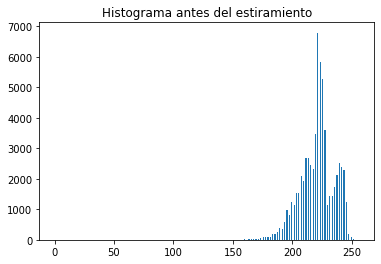

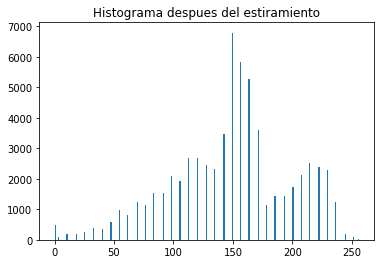

Text(0.5, 1.0, 'Después')

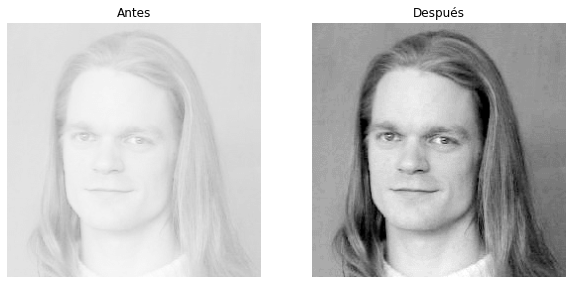

In [52]:
img = cv2.imread('face.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# transformar imagen a np.float32
img = img.astype(np.float32)

# ---
# plotear histograma de la imagen antes
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma antes del estiramiento')
plt.show()

# defina valores v_min y v_max: los determinamos a partir del histograma
v_min = 180
v_max = 250

# ---
# transformar imagen
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # aplicar transformación
        img[i, j] = 255*(img[i, j]-v_min)/(v_max-v_min)
        if img[i, j] > 255: #este if permite normalizar los valores que exceden el rango
            img[i, j] = 255
        if img[i, j] < 0:
            img[i, j] = 0


# transformar imagen a np.uint8
img = img.astype(np.uint8)

# ---
# plotear histograma de la imagen despues
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma despues del estiramiento')
plt.show()

# mostrar imagen
fig = plt.figure(figsize=(10, 10))
rows = 1
columns = 2

# imagen sin mejora
bad_face = cv2.imread('face.png')
bad_face_gray = cv2.cvtColor(bad_face, cv2.COLOR_BGR2GRAY)
fig.add_subplot(rows, columns, 1) 
  
plt.imshow(bad_face_gray,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Antes")

# imagen mejorada
fig.add_subplot(rows, columns, 2) 
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Después')





### Old

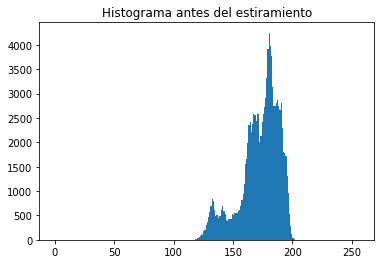

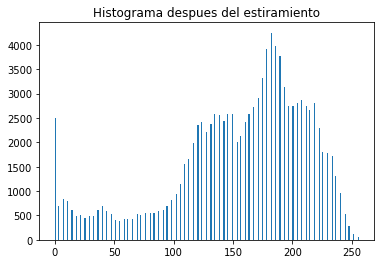

Text(0.5, 1.0, 'Después')

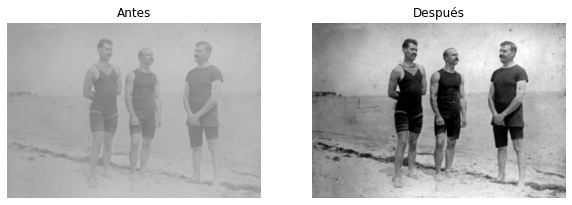

In [53]:
img = cv2.imread('old.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# transformar imagen a np.float32
img = img.astype(np.float32)

# ---
# plotear histograma de la imagen antes
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma antes del estiramiento')
plt.show()

# defina valores v_min y v_max (puede utilizar np.min y np.max si lo prefiere)
v_min = 130
v_max = 200

# ---
# transformar imagen
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # aplicar transformación
        img[i, j] = 255*(img[i, j]-v_min)/(v_max-v_min)
        if img[i, j] > 255: #este if permite normalizar los valores que exceden el rango
            img[i, j] = 255
        if img[i, j] < 0:
            img[i, j] = 0


# transformar imagen a np.uint8
img = img.astype(np.uint8)

# ---
# plotear histograma de la imagen despues
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma despues del estiramiento')
plt.show()

# mostrar imagen
fig = plt.figure(figsize=(10, 10))
rows = 1
columns = 2

# imagen sin mejora
bad_old = cv2.imread('old.png')
bad_old_gray = cv2.cvtColor(bad_old, cv2.COLOR_BGR2GRAY)
fig.add_subplot(rows, columns, 1) 
  
plt.imshow(bad_old_gray,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Antes")

# imagen mejorada
fig.add_subplot(rows, columns, 2) 
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Después')


### River

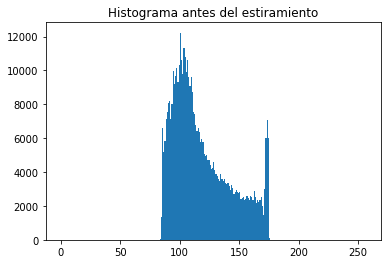

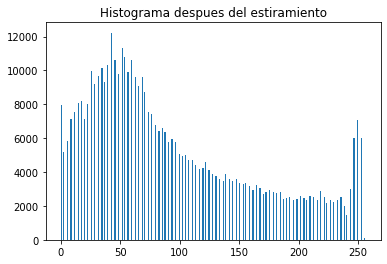

Text(0.5, 1.0, 'Después')

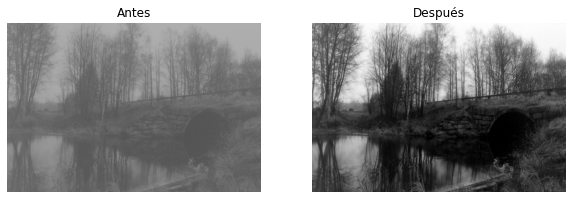

In [54]:
img = cv2.imread('river.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# transformar imagen a np.float32
img = img.astype(np.float32)

# ---
# plotear histograma de la imagen antes
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma antes del estiramiento')
plt.show()

# defina valores v_min y v_max (puede utilizar np.min y np.max si lo prefiere)
v_min = 85
v_max = 175

# ---
# transformar imagen
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # aplicar transformación
        img[i, j] = 255*(img[i, j]-v_min)/(v_max-v_min)
        if img[i, j] > 255: #este if permite normalizar los valores que exceden el rango
            img[i, j] = 255
        if img[i, j] < 0:
            img[i, j] = 0


# transformar imagen a np.uint8
img = img.astype(np.uint8)

# ---
# plotear histograma de la imagen despues
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma despues del estiramiento')
plt.show()

# mostrar imagen
fig = plt.figure(figsize=(10, 10))
rows = 1
columns = 2

# imagen sin mejora
bad_river = cv2.imread('river.png')
bad_river_gray = cv2.cvtColor(bad_river, cv2.COLOR_BGR2GRAY)
fig.add_subplot(rows, columns, 1) 
  
plt.imshow(bad_river_gray,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Antes")

# imagen mejorada
fig.add_subplot(rows, columns, 2) 
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Después')


### Moon

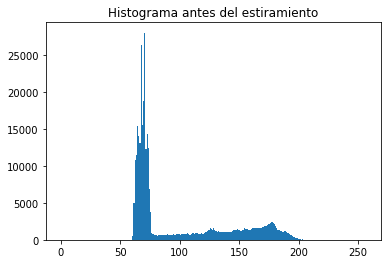

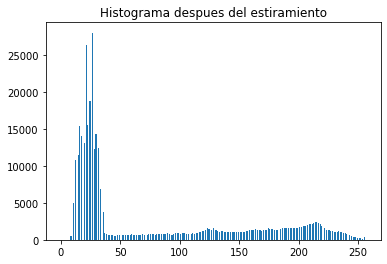

Text(0.5, 1.0, 'Después')

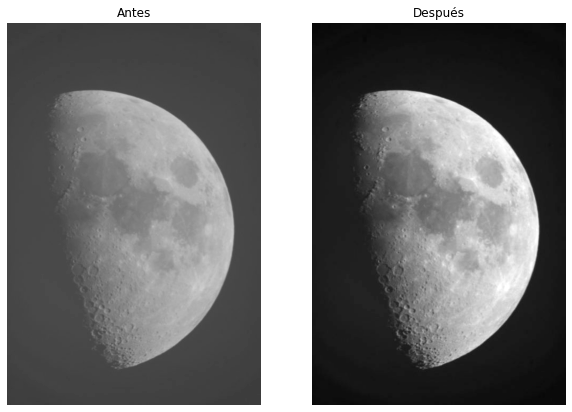

In [55]:
img = cv2.imread('moon.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# transformar imagen a np.float32
img = img.astype(np.float32)


# ---
# plotear histograma de la imagen antes
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma antes del estiramiento')
plt.show()

# defina valores v_min y v_max (puede utilizar np.min y np.max si lo prefiere)
v_min = 55
v_max = 200

# ---
# transformar imagen
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # aplicar transformación
        img[i, j] = 255*(img[i, j]-v_min)/(v_max-v_min)
        if img[i, j] > 255: #este if permite normalizar los valores que exceden el rango
            img[i, j] = 255
        if img[i, j] < 0:
            img[i, j] = 0


# transformar imagen a np.uint8
img = img.astype(np.uint8)

# ---
# plotear histograma de la imagen despues
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma despues del estiramiento')
plt.show()

# mostrar imagen
fig = plt.figure(figsize=(10, 10))
rows = 1
columns = 2

# imagen sin mejora
bad_moon = cv2.imread('moon.png')
bad_moon_gray = cv2.cvtColor(bad_moon, cv2.COLOR_BGR2GRAY)
fig.add_subplot(rows, columns, 1) 
  
plt.imshow(bad_moon_gray,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Antes")

# imagen mejorada
fig.add_subplot(rows, columns, 2) 
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Después')


### Church

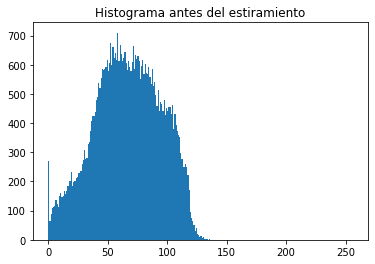

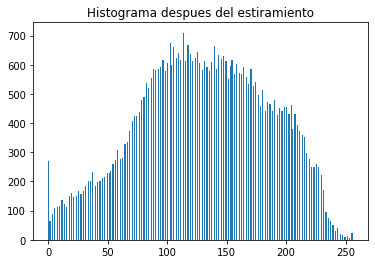

Text(0.5, 1.0, 'Después')

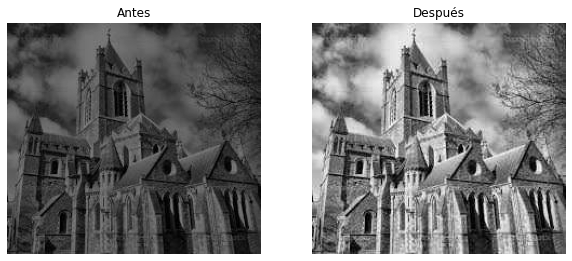

In [56]:
img = cv2.imread('church.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# transformar imagen a np.float32
img = img.astype(np.float32)

# ---
# plotear histograma de la imagen antes
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma antes del estiramiento')
plt.show()

# defina valores v_min y v_max (puede utilizar np.min y np.max si lo prefiere)
v_min = 0
v_max = 130

# ---
# transformar imagen
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # aplicar transformación
        img[i, j] = 255*(img[i, j]-v_min)/(v_max-v_min)
        if img[i, j] > 255: #este if permite normalizar los valores que exceden el rango
            img[i, j] = 255
        if img[i, j] < 0:
            img[i, j] = 0


# transformar imagen a np.uint8
img = img.astype(np.uint8)

# ---
# plotear histograma de la imagen despues
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma despues del estiramiento')
plt.show()

# mostrar imagen
fig = plt.figure(figsize=(10, 10))
rows = 1
columns = 2

# imagen sin mejora
bad_church = cv2.imread('church.png')
bad_church_gray = cv2.cvtColor(bad_church, cv2.COLOR_BGR2GRAY)
fig.add_subplot(rows, columns, 1) 
  
plt.imshow(bad_church_gray,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Antes")

# imagen mejorada
fig.add_subplot(rows, columns, 2) 
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Después')

### Comentario sobre resultados: 
Como se puede observar en las figuras anteriores, el estiramiento lineal de contraste es una tecnica bastante útil al momento de mejorar la visibilidad de la imagen, permitiendo distinguir algunos detalles de la fotografía que antes eran imperceptibles.

## **Parte 3**

En la siguiente sección se comienza a utilizar la transformada de fourier sobre las imágenes 'fence', 'diagonal' y 'horizon', para luego visualizar su magnitud y posteriormente aplicar la transformación logarítmica a la transformada antes calculada.

(-0.5, 562.5, 406.5, -0.5)

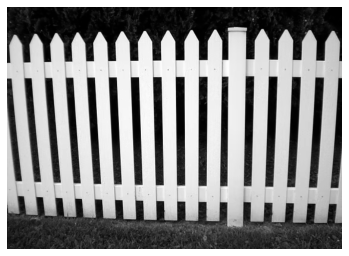

In [57]:
img = cv2.imread('fence.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# mostrar imagen
fig = plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

In [58]:
img_fourier = np.fft.fft2(img)
img_fourier_shift = np.fft.fftshift(img_fourier)

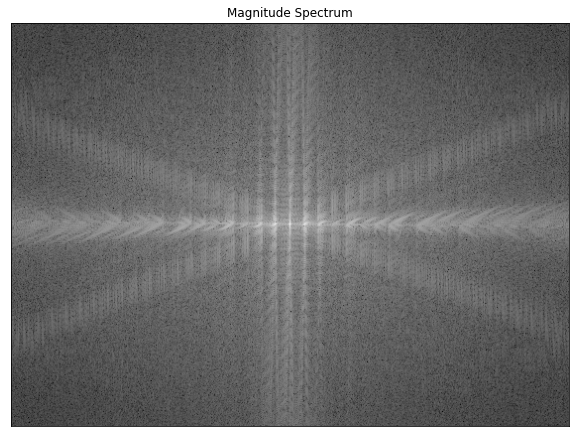

In [59]:
magnitude_spectrum = 20*np.log(np.abs(img_fourier_shift))

fig = plt.figure(figsize=(10, 10))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

La visualización de la Transformada de Fourier de la imagen nos permitirá más adelante aplicar filtros directamente, ya que con esta podemos ver que frecuencias dominan en la fotografía (altas o bajas).

### Transformación logaritmica

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


Text(0.5, 1.0, 'Espectro Transformado')

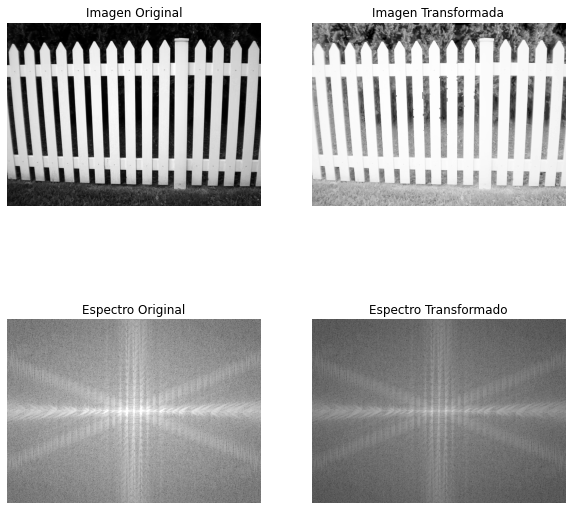

In [80]:
# Cargamos la imagen
fence = cv2.imread('fence.png') 
# Pasamos a escala de grises
fence_gray = cv2.cvtColor(fence, cv2.COLOR_BGR2GRAY)
# Calculamos la transformada de fourier
fence_fourier = np.fft.fft2(fence_gray)
fence_fourier_shift = np.fft.fftshift(fence_fourier)
# Obtenemos la magnitud del espectro
fence_spectrum = 20*np.log(np.abs(fence_fourier_shift))
# Aplicamos la transformada logaritmica a la imagen original para apreciar los cambios en esta
c = 255 / np.log(1 + np.max(np.abs(fence_gray))) 
log_image = c * (np.log(np.abs(fence_gray) + 1))
log_image = np.array(log_image, dtype = np.uint8) 
# Aplicamos la transformada logarítmica a la transformada de fourier
c2 = 255 / np.log(1+np.max(np.abs(fence_fourier_shift)))
log_spectrum = c2 * (np.log(np.abs(fence_fourier_shift) + 1))
log_spectrum = np.array(log_spectrum, dtype = np.uint8)

# Mostramos las imágenes importantes
fig = plt.figure(figsize=(10, 10))
rows = 2
columns = 2
# Figura 1:
fig.add_subplot(rows, columns, 1) 
plt.imshow(fence_gray,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Original")
# Figura 2: 
fig.add_subplot(rows, columns, 2)  
plt.imshow(log_image,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Transformada")
# Figura 3:
fig.add_subplot(rows, columns, 3) 
plt.imshow(fence_spectrum,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Original")
# Figura 4: 
fig.add_subplot(rows, columns, 4)  
plt.imshow(log_spectrum,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Transformado")

Para las siguientes imágenes se utilizará el mismo procedimiento/código y solamente variará el nombre de las variables para la visualización de resultados.

### Horizon

Text(0.5, 1.0, 'Espectro Transformado')

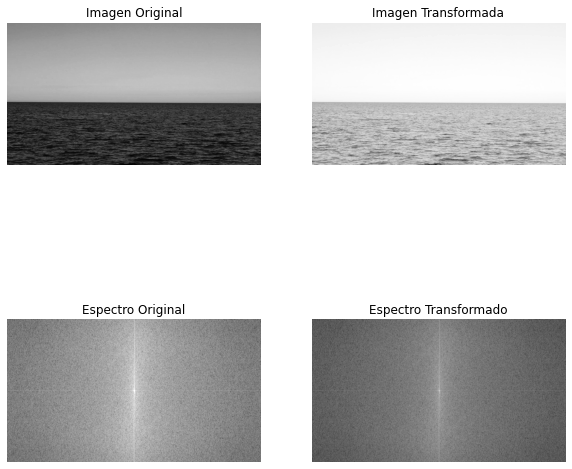

In [81]:
# Cargamos la imagen
horizon = cv2.imread('horizon.jpg') 
# Pasamos a escala de grises
horizon_gray = cv2.cvtColor(horizon, cv2.COLOR_BGR2GRAY)
# Calculamos la transformada de fourier
horizon_fourier = np.fft.fft2(horizon_gray)
horizon_fourier_shift = np.fft.fftshift(horizon_fourier)
# Obtenemos la magnitud del espectro
horizon_spectrum = 20*np.log(np.abs(horizon_fourier_shift))
# Aplicamos la transformada logaritmica a la imagen original para apreciar los cambios en esta
c = 255 / np.log(1 + np.max(np.abs(horizon_gray))) 
log_image = c * (np.log(np.abs(horizon_gray) + 1))
log_image = np.array(log_image, dtype = np.uint8) 
# Aplicamos la transformada logarítmica a la transformada de fourier
c2 = 255 / np.log(1+np.max(np.abs(horizon_fourier_shift)))
log_spectrum = c2 * (np.log(np.abs(horizon_fourier_shift) + 1))
log_spectrum = np.array(log_spectrum, dtype = np.uint8)

# Mostramos las imágenes importantes
fig = plt.figure(figsize=(10, 10))
rows = 2
columns = 2
# Figura 1:
fig.add_subplot(rows, columns, 1) 
plt.imshow(horizon_gray,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Original")
# Figura 2: 
fig.add_subplot(rows, columns, 2)  
plt.imshow(log_image,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Transformada")
# Figura 3:
fig.add_subplot(rows, columns, 3) 
plt.imshow(horizon_spectrum,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Original")
# Figura 4: 
fig.add_subplot(rows, columns, 4)  
plt.imshow(log_spectrum,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Transformado")

### Diagonal

Text(0.5, 1.0, 'Espectro Transformado')

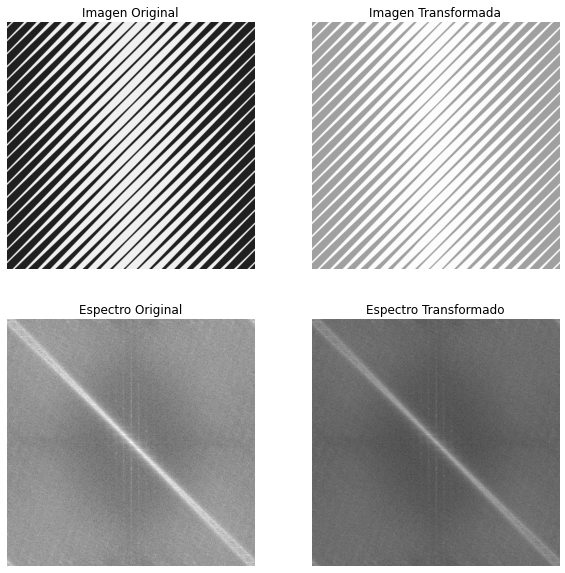

In [83]:
# Cargamos la imagen
diagonal = cv2.imread('diagonal.jpg') 
# Pasamos a escala de grises
diagonal_gray = cv2.cvtColor(diagonal, cv2.COLOR_BGR2GRAY)
# Calculamos la transformada de fourier
diagonal_fourier = np.fft.fft2(diagonal_gray)
diagonal_fourier_shift = np.fft.fftshift(diagonal_fourier)
# Obtenemos la magnitud del espectro
diagonal_spectrum = 20*np.log(np.abs(diagonal_fourier_shift))
# Aplicamos la transformada logaritmica a la imagen original para apreciar los cambios en esta
c = 255 / np.log(1 + np.max(np.abs(diagonal_gray))) 
log_image = c * (np.log(np.abs(diagonal_gray) + 1))
log_image = np.array(log_image, dtype = np.uint8) 
# Aplicamos la transformada logarítmica a la transformada de fourier
c2 = 255 / np.log(1+np.max(np.abs(diagonal_fourier_shift)))
log_spectrum = c2 * (np.log(np.abs(diagonal_fourier_shift) + 1))
log_spectrum = np.array(log_spectrum, dtype = np.uint8)

# Mostramos las imágenes importantes
fig = plt.figure(figsize=(10, 10))
rows = 2
columns = 2
# Figura 1:
fig.add_subplot(rows, columns, 1) 
plt.imshow(diagonal_gray,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Original")
# Figura 2: 
fig.add_subplot(rows, columns, 2)  
plt.imshow(log_image,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Transformada")
# Figura 3:
fig.add_subplot(rows, columns, 3) 
plt.imshow(diagonal_spectrum,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Original")
# Figura 4: 
fig.add_subplot(rows, columns, 4)  
plt.imshow(log_spectrum,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Transformado")

### Comentario sobre Resultados:
En los resultados anteriores se puede observar que la transformación de las imágenes no es óptima y que en la mayoría de estas se pierde visibilidad de los objetos, esto debido a que la transformación logarítmica "equilibra" los valores de grises del espectro y permite una mejor visualización de estos, por este motivo, en los tres espectros se puede notar una mejoría y mejor apreciación de sus detalles.

## Parte 4

En la parte final de esta experiencia se utilizará la misma estrategia anterior, no obstante, para finalizar se probarán los métodos getRotationMatrix2D y warpAffine, donde el primero nos entrega una matriz de rotación y el segundo toma la imagen original y le aplica la transformación (rotación en este caso).

### Pacman

Text(0.5, 1.0, 'Espectro Transformado Rotado 60°')

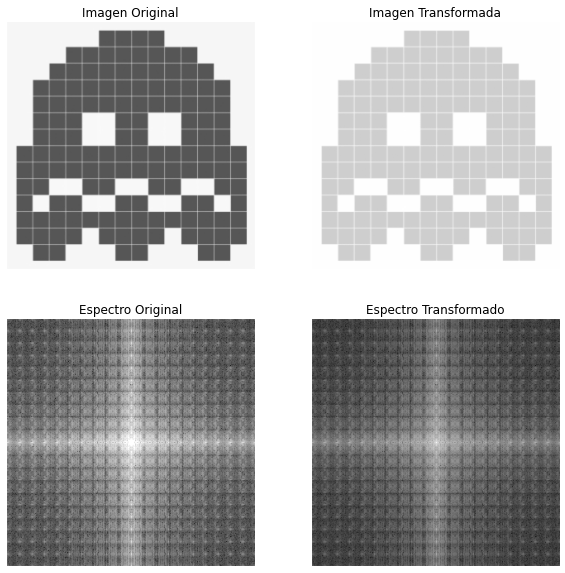

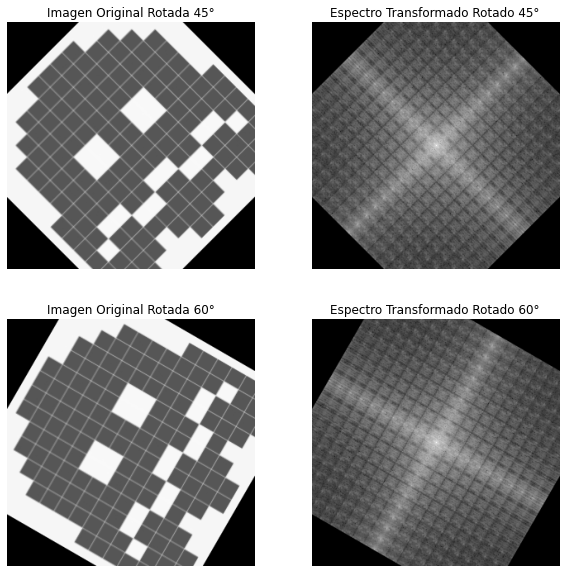

In [88]:
# Cargamos la imagen
pacman = cv2.imread('pacman.png') 
# Pasamos a escala de grises
pacman_gray = cv2.cvtColor(pacman, cv2.COLOR_BGR2GRAY)
# Calculamos la transformada de fourier
pacman_fourier = np.fft.fft2(pacman_gray)
pacman_fourier_shift = np.fft.fftshift(pacman_fourier)
# Obtenemos la magnitud del espectro
pacman_spectrum = 20*np.log(np.abs(pacman_fourier_shift))
# Aplicamos la transformada logaritmica a la imagen original para apreciar los cambios en esta
c = 255 / np.log(1 + np.max(np.abs(pacman_gray))) 
log_image = c * (np.log(np.abs(pacman_gray) + 1))
log_image = np.array(log_image, dtype = np.uint8) 
# Aplicamos la transformada logarítmica a la transformada de fourier
c2 = 255 / np.log(1+np.max(np.abs(pacman_fourier_shift)))
log_spectrum = c2 * (np.log(np.abs(pacman_fourier_shift) + 1))
log_spectrum = np.array(log_spectrum, dtype = np.uint8)

# Mostramos las imágenes importantes
fig = plt.figure(figsize=(10, 10))
rows = 2
columns = 2
# Figura 1:
fig.add_subplot(rows, columns, 1) 
plt.imshow(pacman_gray,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Original")
# Figura 2: 
fig.add_subplot(rows, columns, 2)  
plt.imshow(log_image,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Transformada")
# Figura 3:
fig.add_subplot(rows, columns, 3) 
plt.imshow(pacman_spectrum,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Original")
# Figura 4: 
fig.add_subplot(rows, columns, 4)  
plt.imshow(log_spectrum,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Transformado")

# Luego de haber realizado el mismo procedimiento, se procede a obtener la rotación
# de la imagen con los métodos antes mencionados.
ancho_image = pacman_gray.shape[1] # Dimensiones de la imagen original
alto_image = pacman_gray.shape[0] 

ancho_spectrum = log_spectrum.shape[1] # Dimensiones del espectro transformado
alto_spectrum = log_spectrum.shape[0]

# Rotación imagen original 45°
M = cv2.getRotationMatrix2D((ancho_image//2,alto_image//2),45,1)
rotate_image45 = cv2.warpAffine(pacman_gray,M,(ancho_image,alto_image))

# Rotación espectro transformado 45°
M2 = cv2.getRotationMatrix2D((ancho_spectrum//2,alto_spectrum//2),45,1)
rotate_spectrum45 = cv2.warpAffine(log_spectrum,M2,(ancho_spectrum,alto_spectrum))

# Rotación imagen original 60°
M3 = cv2.getRotationMatrix2D((ancho_image//2,alto_image//2),60,1)
rotate_image60 = cv2.warpAffine(pacman_gray,M3,(ancho_image,alto_image))

# Rotación espectro transformado 60°
M4 = cv2.getRotationMatrix2D((ancho_spectrum//2,alto_spectrum//2),60,1)
rotate_spectrum60 = cv2.warpAffine(log_spectrum,M4,(ancho_spectrum,alto_spectrum))

# Mostramos los resultados rotados.
fig2 = plt.figure(figsize=(10, 10))
rows = 2
columns = 2
# Figura 1:
fig2.add_subplot(rows, columns, 1) 
plt.imshow(rotate_image45,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Original Rotada 45°")
# Figura 2: 
fig2.add_subplot(rows, columns, 2)  
plt.imshow(rotate_spectrum45,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Transformado Rotado 45°")
# Figura 3:
fig2.add_subplot(rows, columns, 3) 
plt.imshow(rotate_image60,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Original Rotada 60°")
# Figura 4: 
fig2.add_subplot(rows, columns, 4)  
plt.imshow(rotate_spectrum60,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Transformado Rotado 60°")

### Cuad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


Text(0.5, 1.0, 'Espectro Transformado Rotado 60°')

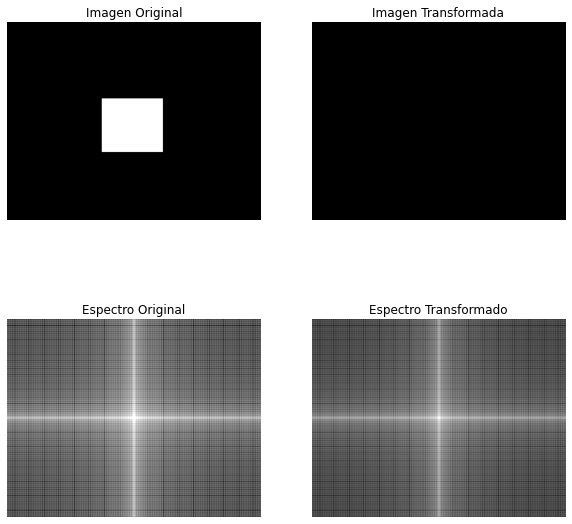

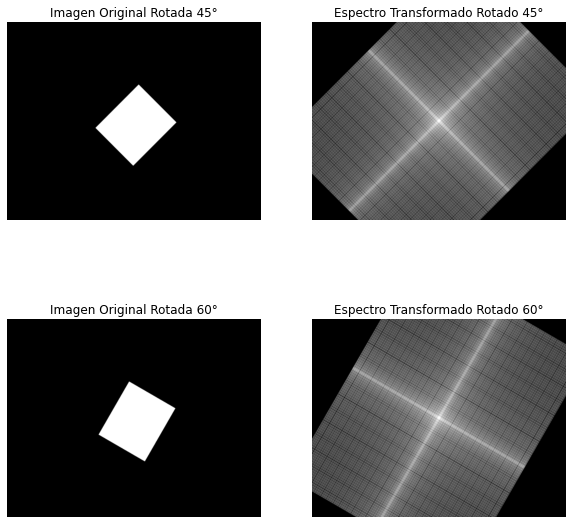

In [89]:
# Cargamos la imagen
cuad = cv2.imread('cuad.png') 
# Pasamos a escala de grises
cuad_gray = cv2.cvtColor(cuad, cv2.COLOR_BGR2GRAY)
# Calculamos la transformada de fourier
cuad_fourier = np.fft.fft2(cuad_gray)
cuad_fourier_shift = np.fft.fftshift(cuad_fourier)
# Obtenemos la magnitud del espectro
cuad_spectrum = 20*np.log(np.abs(cuad_fourier_shift))
# Aplicamos la transformada logaritmica a la imagen original para apreciar los cambios en esta
c = 255 / np.log(1 + np.max(np.abs(cuad_gray))) 
log_image = c * (np.log(np.abs(cuad_gray) + 1))
log_image = np.array(log_image, dtype = np.uint8) 
# Aplicamos la transformada logarítmica a la transformada de fourier
c2 = 255 / np.log(1+np.max(np.abs(cuad_fourier_shift)))
log_spectrum = c2 * (np.log(np.abs(cuad_fourier_shift) + 1))
log_spectrum = np.array(log_spectrum, dtype = np.uint8)

# Mostramos las imágenes importantes
fig = plt.figure(figsize=(10, 10))
rows = 2
columns = 2
# Figura 1:
fig.add_subplot(rows, columns, 1) 
plt.imshow(cuad_gray,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Original")
# Figura 2: 
fig.add_subplot(rows, columns, 2)  
plt.imshow(log_image,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Transformada")
# Figura 3:
fig.add_subplot(rows, columns, 3) 
plt.imshow(cuad_spectrum,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Original")
# Figura 4: 
fig.add_subplot(rows, columns, 4)  
plt.imshow(log_spectrum,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Transformado")

# Luego de haber realizado el mismo procedimiento, se procede a obtener la rotación
# de la imagen con los métodos antes mencionados.
ancho_image = cuad_gray.shape[1] # Dimensiones de la imagen original
alto_image = cuad_gray.shape[0] 

ancho_spectrum = log_spectrum.shape[1] # Dimensiones del espectro transformado
alto_spectrum = log_spectrum.shape[0]

# Rotación imagen original 45°
M = cv2.getRotationMatrix2D((ancho_image//2,alto_image//2),45,1)
rotate_image45 = cv2.warpAffine(cuad_gray,M,(ancho_image,alto_image))

# Rotación espectro transformado 45°
M2 = cv2.getRotationMatrix2D((ancho_spectrum//2,alto_spectrum//2),45,1)
rotate_spectrum45 = cv2.warpAffine(log_spectrum,M2,(ancho_spectrum,alto_spectrum))

# Rotación imagen original 60°
M3 = cv2.getRotationMatrix2D((ancho_image//2,alto_image//2),60,1)
rotate_image60 = cv2.warpAffine(cuad_gray,M3,(ancho_image,alto_image))

# Rotación espectro transformado 60°
M4 = cv2.getRotationMatrix2D((ancho_spectrum//2,alto_spectrum//2),60,1)
rotate_spectrum60 = cv2.warpAffine(log_spectrum,M4,(ancho_spectrum,alto_spectrum))

# Mostramos los resultados rotados.
fig2 = plt.figure(figsize=(10, 10))
rows = 2
columns = 2
# Figura 1:
fig2.add_subplot(rows, columns, 1) 
plt.imshow(rotate_image45,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Original Rotada 45°")
# Figura 2: 
fig2.add_subplot(rows, columns, 2)  
plt.imshow(rotate_spectrum45,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Transformado Rotado 45°")
# Figura 3:
fig2.add_subplot(rows, columns, 3) 
plt.imshow(rotate_image60,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Imagen Original Rotada 60°")
# Figura 4: 
fig2.add_subplot(rows, columns, 4)  
plt.imshow(rotate_spectrum60,cmap='gray', vmin=0, vmax=255) 
plt.axis('off') 
plt.title("Espectro Transformado Rotado 60°")

### Comentario sobre Resultados:
Como se puede observar, los resultados en cuanto a transformación logarítmica se mantienen con respecto a la parte anterior, por otro lado, podemos ver para ambas imágenes sus rotaciones en 45° y 60° mediante los métodos mencionados. Cabe destacar que esta rotación se produce en sentido antihorario y produce una "pérdida de información" ya que al girar la imagen se pierde parte de la imagen debido a las dimensiones de esta.